In [3]:
import pandas as pd
import numpy as np
import umap
import scanpy as sc

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
temp['IL']

In [6]:
data = pd.read_csv('../data/scrnaseq/test_mat.csv', sep=',', header=0, index_col=0)

In [7]:
meta = pd.read_csv('../data/scrnaseq/meta_data_smartseq2.csv', sep=',', header=0, index_col=0)

In [11]:
meta.head()

,nnet2,ident,technology
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,B cells,B cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,NK cells,NK cells,Smart-Seq2


In [10]:
data.head()

,SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,SMARTseqFINAL_allLanes_AACATCCGCGGAAGAA,SMARTseqFINAL_allLanes_AACATCCGCGGCATTA,SMARTseqFINAL_allLanes_AACATCCGCTATGTGG,SMARTseqFINAL_allLanes_AACATCCGGAATCCAG,SMARTseqFINAL_allLanes_AACATCCGGAGGAGAA,...,SMARTseqFINAL_allLanes_TTGTCGTGCCTGAGAA,SMARTseqFINAL_allLanes_TTGTCGTGCTAAGCAG,SMARTseqFINAL_allLanes_TTGTCGTGGACACCAA,SMARTseqFINAL_allLanes_TTGTCGTGGCGACTAA,SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA,SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA,SMARTseqFINAL_allLanes_TTGTCGTGGTTGACCA,SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA,SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA
TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,3.186911,0.0,0.0,0.000000
DPM1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.701919,...,0.0,0.000000,0.0,3.222570,0.0,0.0,2.337225,0.0,0.0,0.000000
SCYL3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,1.009579,0.0,0.0,0.000000
C1orf112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
FGR,0.0,3.710542,3.304465,4.164365,1.621903,3.442635,0.0,0.0,0.0,0.000000,...,0.0,4.441022,0.0,2.233954,0.0,0.0,0.000000,0.0,0.0,3.087333


In [12]:
data = data[meta.index]

In [13]:
fil = meta['nnet2'] != 'HEK cells'
meta = meta[fil]
data = data[data.columns[fil]]

In [14]:
data = data[data.mean(1) != 0]

In [15]:
model = umap.UMAP()

In [16]:
data_umap = model.fit_transform(data.T)

In [17]:
data_umap = pd.DataFrame(data_umap, index=data.columns, columns=['UMAP1', 'UMAP2'])

In [18]:
data_umap = data_umap.loc[meta.index]

In [19]:
data_umap['Cell'] = meta.loc[data_umap.index, 'nnet2']

In [20]:
data_umap.head()

,UMAP1,UMAP2,Cell
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,-1.121359,9.515720,NK cells
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,-0.371541,9.689824,NK cells
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,2.260685,-2.531390,B cells
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,-0.382503,9.437521,NK cells
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,-0.932624,9.112092,NK cells


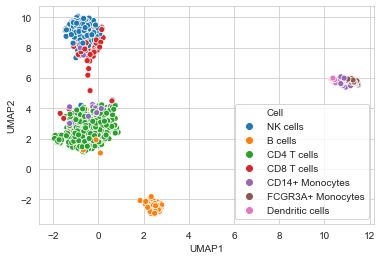

In [21]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Cell'])

In [28]:
list(data.index.unique())

['TSPAN6',
 'DPM1',
 'SCYL3',
 'C1orf112',
 'FGR',
 'CFH',
 'FUCA2',
 'GCLC',
 'NFYA',
 'STPG1',
 'NIPAL3',
 'LAS1L',
 'ENPP4',
 'CFTR',
 'ANKIB1',
 'CYP51A1',
 'KRIT1',
 'RAD52',
 'MYH16',
 'BAD',
 'LAP3',
 'CD99',
 'CD99.1',
 'HS3ST1',
 'WNT16',
 'HECW1',
 'MAD1L1',
 'LASP1',
 'SNX11',
 'TMEM176A',
 'M6PR',
 'KLHL13',
 'ICA1',
 'DBNDD1',
 'ALS2',
 'CASP10',
 'CFLAR',
 'TFPI',
 'NDUFAF7',
 'RBM5',
 'MTMR7',
 'SLC7A2',
 'ARF5',
 'SARM1',
 'POLDIP2',
 'PLXND1',
 'AK2',
 'CD38',
 'FKBP4',
 'KDM1A',
 'RBM6',
 'CAMKK1',
 'RECQL',
 'VPS50',
 'NDUFAB1',
 'ABCB5',
 'SLC25A13',
 'ST7',
 'CDC27',
 'HCCS',
 'DVL2',
 'UPF1',
 'SKAP2',
 'SLC25A5',
 'CCDC109B',
 'POLR2J',
 'DHX33',
 'MEOX1',
 'THSD7A',
 'LIG3',
 'RPAP3',
 'ACSM3',
 'AC004381.6',
 'CIAPIN1',
 'SPPL2B',
 'FAM214B',
 'PRKAR2B',
 'MSL3',
 'CREBBP',
 'BZRAP1',
 'GCFC2',
 'WDR54',
 'CROT',
 'ABCB4',
 'KMT2E',
 'RHBDD2',
 'IBTK',
 'ZNF195',
 'MYCBP2',
 'FBXL3',
 'ITGAL',
 'PDK2',
 'ITGA3',
 'ZFX',
 'LAMP2',
 'ITGA2B',
 'GDE1',
 'C19orf60'

In [29]:
data_umap['Expression'] = data.loc['CD4']

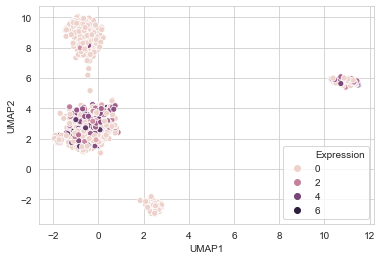

In [30]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])

In [31]:
nn = pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', sep=',', header=0, index_col=0).T

In [32]:
data_norm = ((data - data.min()) / (data.max() - data.min()))
#data_norm = data.copy()

In [33]:
common_genes = list(set(nn.index) & set(data_norm.index))

In [34]:
nn = nn.loc[common_genes]
data_norm = data_norm.loc[common_genes]

In [35]:
data_nn = pd.concat([nn,data_norm], 1)

In [36]:
sim_nn_data = data_nn.corr()

In [37]:
sim_nn_data = sim_nn_data.loc[nn.columns, data_norm.columns]

In [38]:
sim_nn_data = sim_nn_data.T

In [39]:
data_umap['Gene'] = sim_nn_data.loc[data_umap.index, 'IL1A']

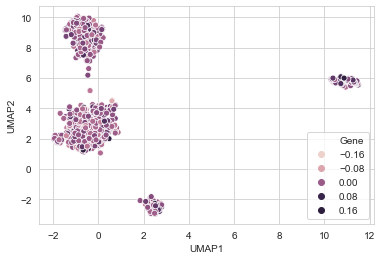

In [40]:
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Gene'])

In [41]:
sim_nn_data = (sim_nn_data - sim_nn_data.mean()) / sim_nn_data.std()

In [42]:
sim_nn_data = ((sim_nn_data.T - sim_nn_data.mean(1)) / sim_nn_data.std(1)).T

In [43]:
sim_nn_data = sim_nn_data.loc[meta.index]
sim_nn_data['Cell'] = meta.loc[sim_nn_data.index, 'nnet2']

In [44]:
average_activity = sim_nn_data.groupby('Cell').mean()

In [45]:
average_activity.loc['B cells'].sort_values()

APLN       -1.009880
AREG       -0.975270
TNFRSF1B   -0.945499
FGFR2      -0.912525
EDN2       -0.905100
              ...   
SPP1        0.718174
IL22        0.780877
CCL20       0.791530
CXCL1       0.792960
CCL1        0.824187
Name: B cells, Length: 213, dtype: float64

In [46]:
average_activity.loc['CD8 T cells'].sort_values()

BMP10      -0.493000
PDGFC      -0.430223
IL24       -0.429538
CCL22      -0.423469
EDN1       -0.408257
              ...   
GDF7        0.373456
TNFRSF1A    0.379888
IL1B        0.405271
AREG        0.436668
EPO         0.502674
Name: CD8 T cells, Length: 213, dtype: float64

In [47]:
plt.plot(data_norm.loc['TNFRSF1A'], sim_nn_data['TNF'], '.')

KeyError: 'TNFRSF1A'

In [665]:
data_norm

,SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,SMARTseqFINAL_allLanes_AACATCCGCGGAAGAA,SMARTseqFINAL_allLanes_AACATCCGCGGCATTA,SMARTseqFINAL_allLanes_AACATCCGCTATGTGG,SMARTseqFINAL_allLanes_AACATCCGGAATCCAG,SMARTseqFINAL_allLanes_AACATCCGGAGGAGAA,...,SMARTseqFINAL_allLanes_TTGTCGTGCCACTGAA,SMARTseqFINAL_allLanes_TTGTCGTGCCTGAGAA,SMARTseqFINAL_allLanes_TTGTCGTGCTAAGCAG,SMARTseqFINAL_allLanes_TTGTCGTGGACACCAA,SMARTseqFINAL_allLanes_TTGTCGTGGCGACTAA,SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA,SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA,SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA
TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
DPM1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.251294,...,0.0,0.0,0.000000,0.0,0.290118,0.0,0.0,0.000000,0.0,0.000000
SCYL3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
C1orf112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
FGR,0.0,0.335164,0.295368,0.405617,0.161258,0.350347,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.409691,0.0,0.201116,0.0,0.0,0.000000,0.0,0.273616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIPK3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRAV8-3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.093645,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRAV9-2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
TRBJ1-4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.173089,0.0,0.000000


In [667]:
data_norm.loc['ERBB2']

SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG    0.000000
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG    0.000000
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA    0.000000
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG    0.225701
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA    0.000000
                                             ...   
SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA    0.000000
SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA    0.000000
Name: ERBB2, Length: 623, dtype: float64